## 10 Layers - 100 Neurons - 1 Year Data - Predicting 2 month

## Pre-requisites

In [3]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 
from statistics import mean
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import seaborn as sns


In [55]:
df = pd.DataFrame()
f = yf.download(tickers = "RELIANCE.NS",
                       start = '2022-01-01',
                       end = '2023-01-02',)

#df = f[[("Adj Close", s) for s in list_of_stocks]]
df = f[["Adj Close"]]
#df.columns = df.columns.droplevel(level=0)
# convert to numpy array
training_set = f.iloc[:,4:5].values
scaler = MinMaxScaler(feature_range = (0,1))
timestep = 15
training_set_scaled = scaler.fit_transform(training_set)
x_train_a = []
y_train_a = []
for i in range(timestep, len(training_set_scaled)):
    x_train_a.append(training_set_scaled[i-timestep: i, 0])
    y_train_a.append(training_set_scaled[i])

x_train_a, y_train_a = np.array(x_train_a), np.array(y_train_a)

[*********************100%***********************]  1 of 1 completed


In [5]:
df2 = pd.DataFrame()
f2 = yf.download(tickers = "RELIANCE.NS",
                       start = '2023-01-01',
                       end = '2023-02-28',)

#df = f[[("Adj Close", s) for s in list_of_stocks]]
df2 = f2[["Adj Close"]]
#df.columns = df.columns.droplevel(level=0)
test_set = f2.iloc[:,4:5].values
test_set_scaled = scaler.transform(test_set)
full_dataset = pd.concat((df, df2), axis = 0)
inputs = full_dataset[len(full_dataset) - len(test_set) - timestep:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(timestep, len(inputs)):
    x_test.append(inputs[i - timestep:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


## Training Model

In [6]:
## make model 
# instntiate model
my_model = Sequential()

# add layers 

#layer 1
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model.add(Dropout(rate = 0.2))

#layer 2
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))


#layer 3
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 4
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 5
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 6
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 7
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 8
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 9
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 10
my_model.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#output layer 
my_model.add(Dense(units = 1))

## compile model 
my_model.compile(optimizer = "adam", loss = "mean_squared_error")

In [7]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 100)           10200     
                                                                 
 dropout (Dropout)           (None, 15, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 100)           20100     
                                                                 
 dropout_1 (Dropout)         (None, 15, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 15, 100)           20100     
                                                                 
 dropout_2 (Dropout)         (None, 15, 100)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 15, 100)           2

In [8]:
numEpochs = 100
numBatch = 20
my_model.fit(x_train_a, y_train_a,  epochs = numEpochs, batch_size = numBatch)

Epoch 1/100
12/12 [==============================] - 7s 24ms/step - loss: 0.1231
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0536
Epoch 3/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0469
Epoch 4/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0401
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0374
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0350
Epoch 7/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0333
Epoch 8/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0367
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0302
Epoch 10/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0306
Epoch 11/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0354
Epoch 12/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0257
Epoch 13/100
12/12 [=====

#### Weights 

In [9]:
weights = []
for layer in my_model.layers:
    weights.append(layer.get_weights())


### Find MSE for every group of layers, hidden, using final weights from the trained model 

In [10]:
# MSE 
mse = []

#### 2 hidden layers 

In [11]:
my_model2 = Sequential()

# add layers 

#layer 1
my_model2.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model2.add(Dropout(rate = 0.2))

#layer 2
my_model2.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model2.add(Dropout(rate = 0.2))

#layer 3
my_model2.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model2.add(Dropout(rate = 0.2))

#output layer 
my_model2.add(Dense(units = 1))

## compile model 
my_model2.compile(optimizer = "adam", loss = "mean_squared_error")

In [12]:
my_model2.layers[0].set_weights(weights[0])
my_model2.layers[2].set_weights(weights[2])
my_model2.layers[4].set_weights(weights[4])
my_model2.layers[6].set_weights(weights[20])

In [13]:
predicted_stock_price = my_model2.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 6ms/step


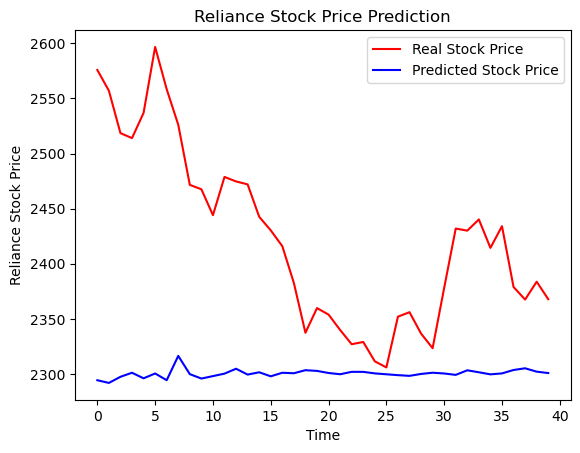

In [14]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [15]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

21524.24426102489

#### 3 hidden layers 

In [16]:
my_model3 = Sequential()

# add layers 

#layer 1
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 2
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 3
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 4
my_model3.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model3.add(Dropout(rate = 0.2))

#output layer 
my_model3.add(Dense(units = 1))

## compile model 
my_model3.compile(optimizer = "adam", loss = "mean_squared_error")

In [17]:
my_model3.layers[0].set_weights(weights[0])
my_model3.layers[2].set_weights(weights[2])
my_model3.layers[4].set_weights(weights[4])
my_model3.layers[6].set_weights(weights[6])
my_model3.layers[8].set_weights(weights[20])

In [18]:
predicted_stock_price = my_model3.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 5ms/step


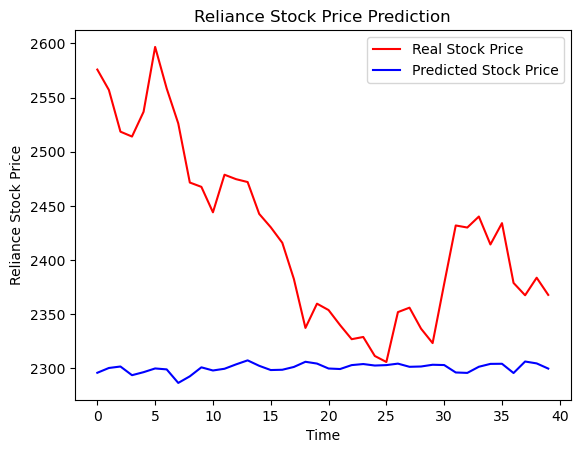

In [19]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [20]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

21648.32636524886

#### 4 hidden layers 

In [21]:
my_model4 = Sequential()

# add layers 

#layer 1
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 2
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 3
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 4
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 5
my_model4.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model4.add(Dropout(rate = 0.2))

#output layer 
my_model4.add(Dense(units = 1))

## compile model 
my_model4.compile(optimizer = "adam", loss = "mean_squared_error")

In [22]:
my_model4.layers[0].set_weights(weights[0])
my_model4.layers[2].set_weights(weights[2])
my_model4.layers[4].set_weights(weights[4])
my_model4.layers[6].set_weights(weights[6])
my_model4.layers[8].set_weights(weights[8])
my_model4.layers[10].set_weights(weights[20])

In [23]:
predicted_stock_price = my_model4.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 4ms/step


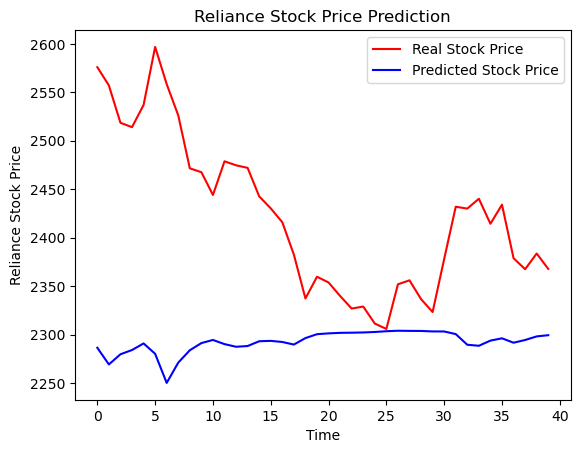

In [24]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [25]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

24905.431416395306

#### 6 hidden layers 

In [26]:
my_model6 = Sequential()

# add layers 

#layer 1
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 2
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 3
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 4
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 5
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 6
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 7
my_model6.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model6.add(Dropout(rate = 0.2))

#output layer 
my_model6.add(Dense(units = 1))

## compile model 
my_model6.compile(optimizer = "adam", loss = "mean_squared_error")

In [27]:
my_model6.layers[0].set_weights(weights[0])
my_model6.layers[2].set_weights(weights[2])
my_model6.layers[4].set_weights(weights[4])
my_model6.layers[6].set_weights(weights[6])
my_model6.layers[8].set_weights(weights[8])
my_model6.layers[10].set_weights(weights[10])
my_model6.layers[12].set_weights(weights[12])
my_model6.layers[14].set_weights(weights[20])

In [28]:
predicted_stock_price = my_model6.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 6ms/step


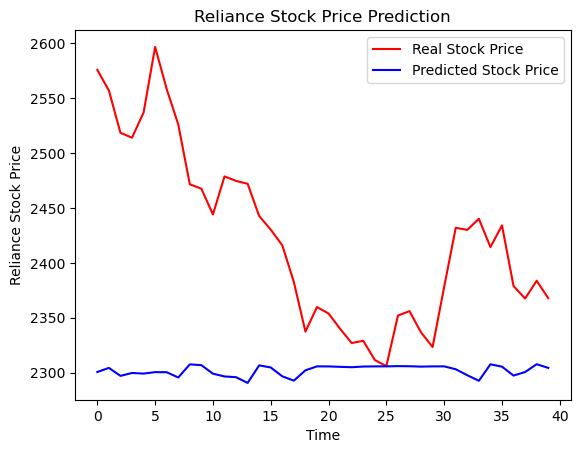

In [29]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [30]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

21309.83535004258

#### 8 hidden layers 

In [31]:
my_model8 = Sequential()

# add layers 

#layer 1
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 2
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 3
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 4
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 5
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 6
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 7
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 8
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 9
my_model8.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model8.add(Dropout(rate = 0.2))

#output layer 
my_model8.add(Dense(units = 1))

## compile model 
my_model8.compile(optimizer = "adam", loss = "mean_squared_error")

In [32]:
my_model8.layers[0].set_weights(weights[0])
my_model8.layers[2].set_weights(weights[2])
my_model8.layers[4].set_weights(weights[4])
my_model8.layers[6].set_weights(weights[6])
my_model8.layers[8].set_weights(weights[8])
my_model8.layers[10].set_weights(weights[10])
my_model8.layers[12].set_weights(weights[12])
my_model8.layers[14].set_weights(weights[14])
my_model8.layers[16].set_weights(weights[16])
my_model8.layers[18].set_weights(weights[20])

In [33]:
predicted_stock_price = my_model8.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 7ms/step


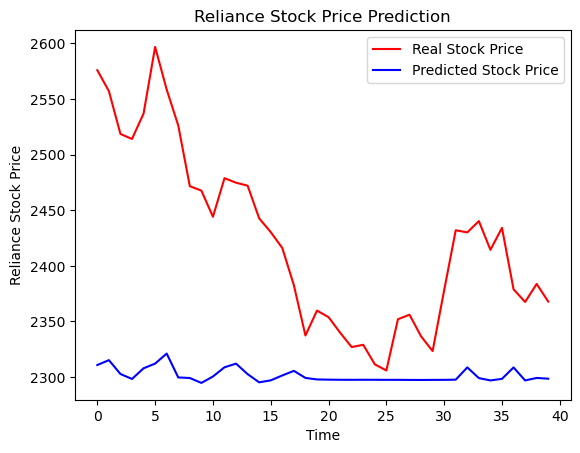

In [34]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [35]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

20502.698502133786

#### 9 hidden layers - All Layers 

#### initial layers

In [36]:
my_model9 = Sequential()

# add layers 

#layer 1
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 2
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 3
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 4
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 5
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 6
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 7
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 8
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 9
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 10
my_model9.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model9.add(Dropout(rate = 0.2))

#output layer 
my_model9.add(Dense(units = 1))

## compile model 
my_model9.compile(optimizer = "adam", loss = "mean_squared_error")

In [37]:
my_model9.layers[0].set_weights(weights[0])
my_model9.layers[2].set_weights(weights[2])
my_model9.layers[4].set_weights(weights[4])
my_model9.layers[6].set_weights(weights[6])
my_model9.layers[8].set_weights(weights[8])
my_model9.layers[10].set_weights(weights[10])
my_model9.layers[12].set_weights(weights[12])
my_model9.layers[14].set_weights(weights[14])
my_model9.layers[16].set_weights(weights[16])
my_model9.layers[18].set_weights(weights[18])
my_model9.layers[20].set_weights(weights[20])

In [38]:
predicted_stock_price = my_model9.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 7ms/step


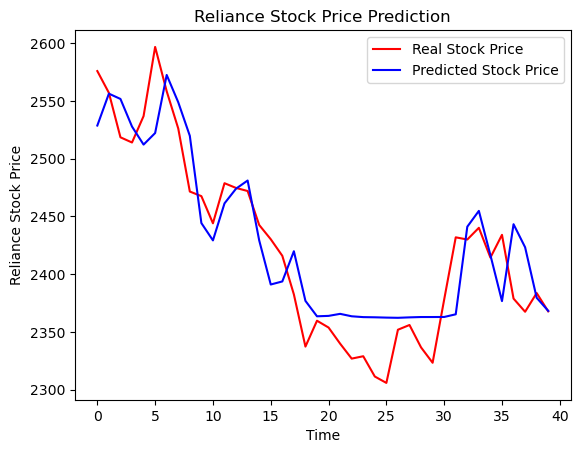

In [39]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [40]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

1153.5306717276574

### Plot graph for accuracy for inreasing number of layers

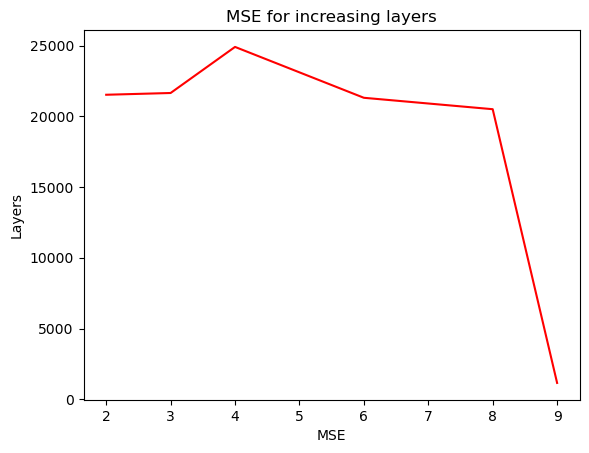

In [41]:
plt.plot([2, 3, 4, 6, 8, 9], mse, color='red')
plt.title('MSE for increasing layers')
plt.xlabel('MSE')
plt.ylabel('Layers')
plt.show()

### Do layers with different modularities predict similar patterns? 

#### Taking Layers 1 and 2 

In [53]:
predicted_stock_price = my_model2.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 5ms/step


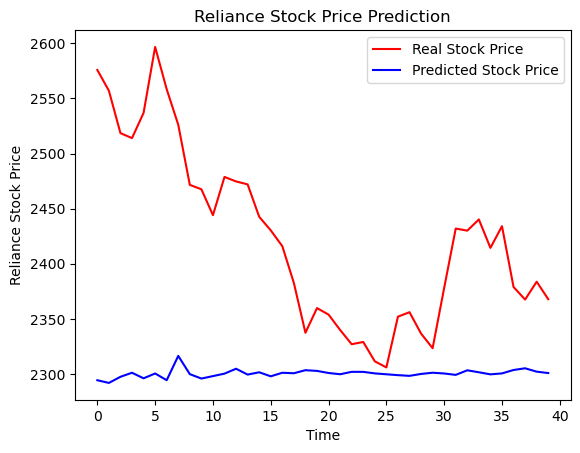

In [54]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

#### Taking Layers 3 to 9

7 hidden layers

In [46]:
my_model8 = Sequential()

# add layers 

#layer 1
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 2
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 3
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 4
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 5
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 6
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 7
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 8
my_model8.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model8.add(Dropout(rate = 0.2))

#output layer 
my_model8.add(Dense(units = 1))

## compile model 
my_model8.compile(optimizer = "adam", loss = "mean_squared_error")

In [50]:
my_model8.layers[0].set_weights(weights[0])
my_model8.layers[2].set_weights(weights[6])
my_model8.layers[4].set_weights(weights[8])
my_model8.layers[6].set_weights(weights[10])
my_model8.layers[8].set_weights(weights[12])
my_model8.layers[10].set_weights(weights[14])
my_model8.layers[12].set_weights(weights[16])
my_model8.layers[14].set_weights(weights[18])
my_model8.layers[16].set_weights(weights[20])

In [51]:
predicted_stock_price = my_model8.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 7ms/step


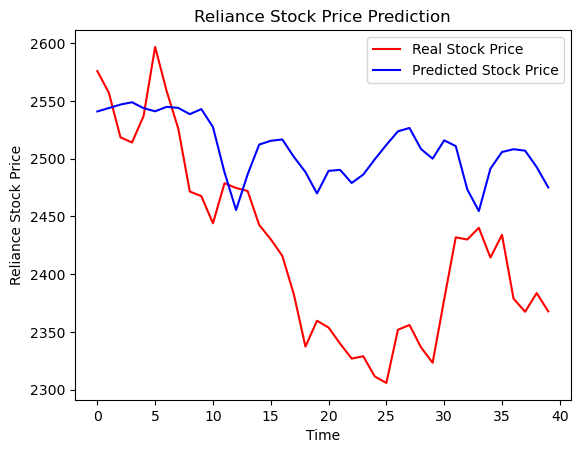

In [52]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

Can we say first 2 layers are predicting major changes and the rest of the hidden layers are predicting minor changes